In [23]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A' : [1, 2, np.nan, 4, 5], 
                   'B' : [6, 7, 8, np.nan, 10], 
                   'C' : [11, 12, 13, np.nan, np.nan]})

df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


In [24]:
pd.isna(df)

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,True


In [25]:
pd.isna(df).sum()

A    1
B    1
C    2
dtype: int64

In [26]:
df_drop_nan = df.dropna()
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


In [27]:
df_0 = df['C'].fillna(0)
print(df_0)

0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64


In [28]:
df_missing = df['A'].fillna('missing')
df_missing

0        1.0
1        2.0
2    missing
3        4.0
4        5.0
Name: A, dtype: object

In [29]:
df_mean = df.fillna(df.mean())
print(df, '\n')
print(df_mean)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A      B     C
0  1.0   6.00  11.0
1  2.0   7.00  12.0
2  3.0   8.00  13.0
3  4.0   7.75  12.0
4  5.0  10.00  12.0


In [30]:
fill_dict= {'A' : df['A'].mean(), 'B' : '12/25', 'C' : 'missing'}
df_filled = df.fillna(value = fill_dict)
df_filled

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/25,missing
4,5.0,10.0,missing


## ***지하수 데이터 수집***

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from datetime import datetime, date, time

warnings.filterwarnings('ignore')

In [32]:
#8개의 파일이 들어있는 폴더를 하나의 파일로 병합하는 데이터병합
path = 'C://sweet/대전태평(암반)/'
#path에 데이터가 업로드 된 경로를 할당
file_list = os.listdir(path)
# os.listdir(path)는 해당 경로에 있는 모든 파일을 리스트형태로 반환
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
#file_list의 8개의 파일들을 하나씩 file=[]에 담되, xlsx확장자가 나타난 파일만 보여준다. 
file_list_py

['대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [33]:
#데이터프레임 하나로 병합
df = pd.DataFrame()
#빈 데이터프레임 객체 df를 만든다. 
for i in file_list_py: #8개의 파일을 하나하나반복
 data = pd.read_excel(path + i) #i는 각각 파일명이다 path/파일명하면 제대로 그 파일을 불러올수있음
 df = pd.concat([df, data]) #df에 변수 data의 내용을 추가한다. (합치라는 명령어)

df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [34]:
#pd.concat([df, data]) 기본적으로 axis=0이므로, 행단위로 데이터가 아래에 추가됨 
# 기존의 df에 새로운 data가 추가된다. 

In [35]:
#행의 인덱스 재설정 reset_index(drop= True) 이용 ,drop=True는 기존에 있던것을 없애버린다는말
df = df.reset_index(drop= True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


df.info() : 데이터 프레임의 전체적인 정보를 보는 함수  
중요한 점은 결측치를 확인하는 것 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


시간에 따른 데이터를 그래프로 표현하기전 
x축이 연속적인 시간이 되어야함  
이를 위해서 날짜와 시간 컬럼을 합쳐야한다  
측정시각 열 생성  

In [38]:
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d')+\
             pd.to_timedelta(df['시간'].astype(int), unit = 'h') 

df.set_index(df['Date'], inplace = True) #date열을 인덱스로 지정
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Data,Date
Date,,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00,2009-01-01 02:00:00


이제 수온, 수위 , EC 속성만 분석하고 싶다  
EC는 전기전도도이다. 수질이 좋을 수록 전기전도도가 낮다.  
새로운 데이터프레임 df1에 3개의 컬럼을 할당한다.  

In [39]:
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC'] #열이름을 영어로 변경한다. 한글이나 기호가 있다면 활용할때 까다롭기 때문이다. 
df1.head(3)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749


In [40]:
#결측치 유무도 확인해주자 
df1.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [41]:
#isnull()함수는 데이터프레임에서 null의 개수를 반환한다. 모든 열에 결측치가 없는것이 확인된다. 

In [42]:
df1.to_csv('./대전지하수.csv', encoding= 'cp949')

### ***이상치 확인 및 제거해보자*** 

통계량과 그래프를 이용하여 데이터에 이상치가 있는지 빠르게 판단하자 

In [43]:
df = pd.read_csv('./대전지하수.csv', index_col= 'Date', parse_dates = True, encoding = 'cp949')
df.describe() 
#통게량은 describe()함수를 이용한다. 

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


해석! : min행 은 최솟값 행, 25%행은 1사분위수 행이다.  
level 열과 EC열에서 최솟값과 1사분위수의 차이가 크다.  
그래서 최솟값이 이상치일 가능성이높다.  

히스토그램으로 데이터의 분포를 확인하여 이상치가 있는지 빠르게 확인해보자  ㅡ

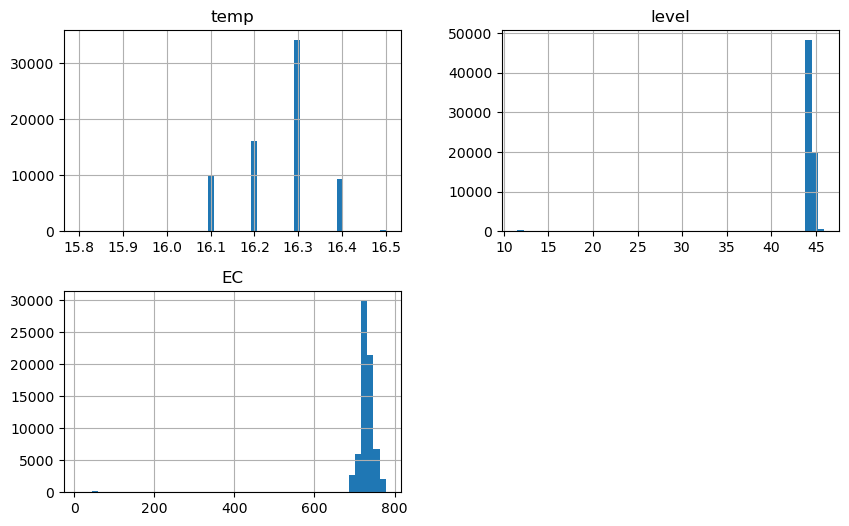

In [44]:
df.hist(bins=50, figsize=(10, 6))
plt.show()

3개의 열별 데이터를 각각 50개의 구간으로 나누어 히스토그램을 3개 만들었다.  
전체적으로 오른쪽으로 치우쳐 있다. 이럴 때 분포의 왼쪽 끝이 이상치일 가능성이 높다  

상자그래프로도 이상치를 확인해보자  

<Axes: >

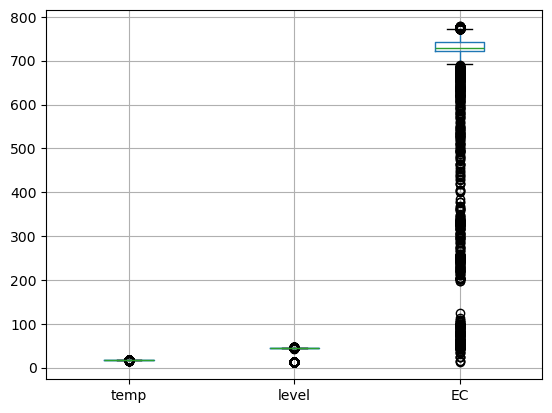

In [45]:
df.boxplot()

In [ ]:
# 지금 EC데이터들이 상대적으로 temp, level 데이터보다 값이 크기때문에 
# temp 과 level의 이상치를 확인하기 어려워서 다중그래프로 이상치를 확인해보자. 

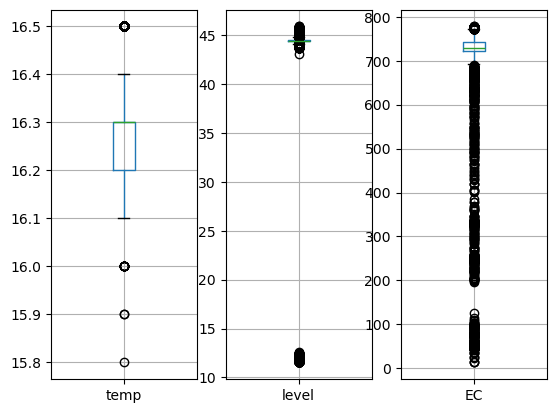

In [48]:
plt.subplot(1, 3, 1)
df.boxplot(column= 'temp', return_type='both' )
plt.subplot(1, 3, 2)
df.boxplot(column= 'level', return_type='both')
plt.subplot(1, 3, 3)
df.boxplot(column= 'EC', return_type='both')
plt.show()

낮은 영역에 이상치가 있음을 확인할 수있다. 

시간에 따른 데이터의 변화를 나타내는 그래프를 그려서 이상치를 확인할 수 있다.   
이 그래프를 시계열 그래프라고 한다. 역시 시계열 그래프를 다중그래프로 확인해보자   

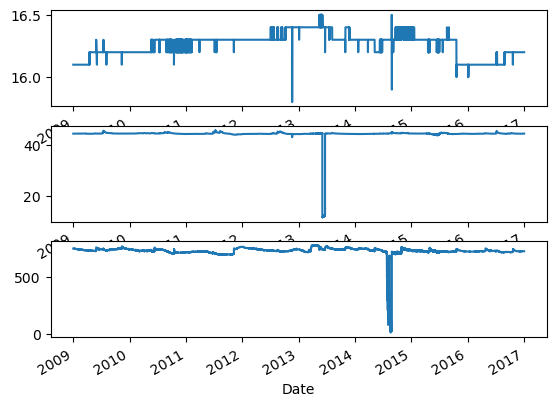

In [49]:
plt.subplot(3, 1, 1)
df['temp'].plot()
plt.subplot(3,1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot()
plt.show()

–지하수온이2012년후반과2014년후반에  
평소보다확연히낮은데, 연속적으로  
변하는값이므로이상치일가능성이높음  

-지하수위는 2013년에 비정상적으로 낮게 나타났다.   
지하수위는 여름철에 비가많이올떄, 서서히 상승하고  
겨울철에 낮아지는다  

-전기전도도는 2014년에 비정상적으로 낮아진 시기가 있다  

사분범위(IQR)을 계산하고, 이를 이용하여 이상치를 탐지해본다.  

'사분위수'는 quantile()함수로 계산한다.  
describe라는 기초통계량을 보여준 함수의 결과에서 사분위수를 볼수 있지만 quantile로 직접계산해볼수 있다.  
quantile(q=0.75) = 3사분위수 라는 뜻이고 quantile(q=0.25) = 1사분위수 라는 뜻이다 

In [51]:
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

0.17999999999999972


In [52]:
upper_level = q3_level +1.5*iqr_level 
lower_level = q1_level - 1.5*iqr_level
print(upper_level, '/' , lower_level)
print((df['level'] > upper_level).sum())
print((df['level'] < lower_level).sum())

44.81999999999999 / 44.099999999999994
4492
1273


level 데이터에서 상한값을 벗어나는 수치는 4492개이고, 하한값을 벗어나는 이상치는 1273개이다.  

이상치를 제거할건데 iqr를 이용하여 조건만을 가져온다라는 식으로 코드를 짜면,  
이상치를 제외한 데이터를 조회함으로써 이상치를 제거할 수 있음  

<Axes: xlabel='Date'>

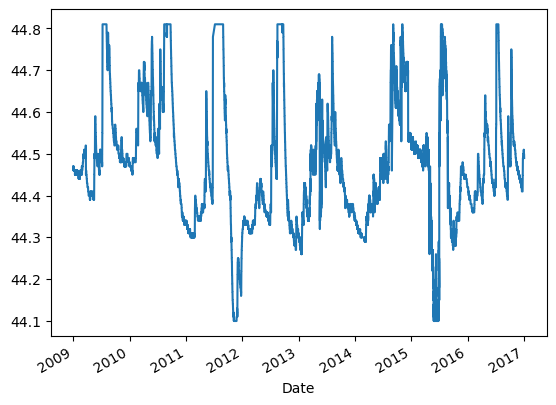

In [53]:
df_iqr_level =df[(df['level']< upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot()

이상치를 제외한 지하수위의 시계열 그래프이다. 이상치가 포함된 시계열데이터와 비교했을떄,  
연중 변화가 명확히 드러나게 되었음을 알 수 있다.  

In [ ]:
이제 이 단계를.. 지하수온에도 적용해본다.  

In [56]:
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp - q1_temp 
print( 'IQR : ' , iqr_temp)

upper_temp = q3_temp + 1.5*iqr_temp
lower_temp = q1_temp - 1.5*iqr_temp
print( upper_temp , '/' , lower_temp)
print( (df['temp'] > upper_temp).sum() ) 
print( (df['temp'] < lower_temp).sum() ) 

IQR :  0.10000000000000142
16.450000000000003 / 16.049999999999997
227
15


지하수온의 데이터가 대략 69548개 있다는점을 고려했을 떄 이상치의 갯수는 매우 적어 ,   
연중 지하수온의 변화가 거의 없음을 알 수 있다 

이제 이 단계를 전기전도도에도 적용해본다  

In [57]:
q3_ec = df['EC'].quantile(q=0.75)
q1_ec = df['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec
print( 'IQR : ' , iqr_ec)
upper_ec = q3_ec + iqr_ec*1.5
lower_ec = q1_ec - iqr_ec*1.5

print(upper_ec, '/' , lower_ec)
print( (df['EC'] > upper_ec).sum() ) 
print( (df['EC'] < lower_ec).sum() ) 



IQR :  20.0
772.0 / 692.0
831
788


In [58]:
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
 (df['level'] < upper_level) & (df['level'] > lower_level) &\
 (df['EC'] < upper_ec) & (df['EC'] > lower_ec)]

In [59]:
df_iqr.describe()

,temp,level,EC
count,61814.000000,61814.000000,61814.000000
mean,16.256793,44.459701,731.698612
std,0.089692,0.128256,13.882905
min,16.100000,44.100000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,742.000000
max,16.400000,44.810000,771.000000


이상치를 제거한만큼 데이터의 갯수가 줄었고,  
데이터를 흐트려지게 만든 이상치를 제거하였으므로 산포가 줄어들었다.  
추가적으로 최솟값과 1사분위수의 차이도 전과 비교할때 크지 않게되었다.  

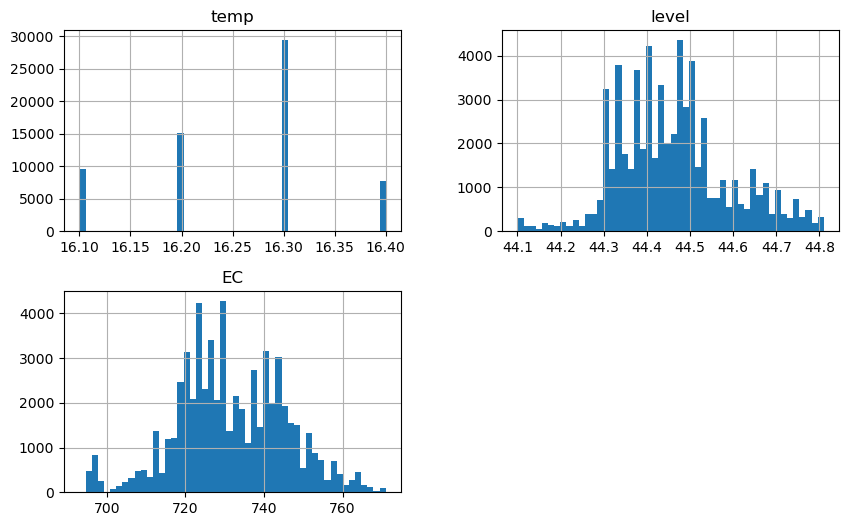

In [61]:
#이상치 제거후 히스토그램
df_iqr.hist(bins=50, figsize = (10, 6))
plt.show()

이상치를 제거하고 나니,  
전에는 오른쪽으로 쏠려있었지만 지금은 정규분포와 가까우며 한쪽으로 치우치지 않게 되었다.  

이상치 제거후 상자그래프를 그려보자 

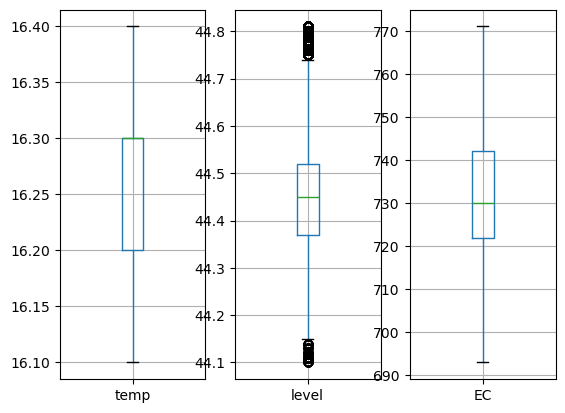

In [64]:
plt.subplot(1,3, 1) 
df_iqr.boxplot(column= 'temp', return_type= 'both')
plt.subplot(1, 3, 2) 
df_iqr.boxplot(column = 'level', return_type = 'both')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column = 'EC', return_type = 'both') 
plt.show()

지하수위는 상한값 위와 하한값 아래에 이상치가 조금씩 나타난다. 

이상치 제거 후 시계열 그래프를 살펴보자 

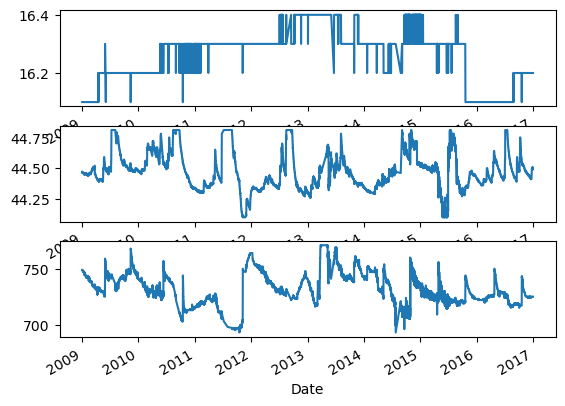

In [65]:
plt.subplot(3, 1, 1)
df_iqr['temp'].plot()
plt.subplot(3, 1, 2) 
df_iqr['level'].plot()
plt.subplot(3, 1, 3)
df_iqr['EC'].plot()
plt.show()

정제된 데이터를 나중에도 사용할 수 있게 csv파일로 저장한다. 

In [66]:
df_iqr.to_csv('대전지하수_정제.csv', encoding = 'cp949')

### ***표준화와 정규화***

In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('./대전지하수_정제.csv')
df.head()

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749
4,2009-01-01 04:00:00,16.1,44.47,749


정제된 데이터를 불러와 열별로 데이터의 범위를 확인해보자 

두열을 선택해서 스케일링 해본다 

In [68]:
df = df[['level', 'EC']]
df.describe()

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


std 표준편차에 주목해보자.  
지하수위의 표준편차는 0.128이지만 EC의 표준편차는 13.883이다  
즉 지하수 전기전도도는 지하수위 보다 100배이상으로 산포가 크다고 말할 수 있다.  
그러나!

데이터의 크기가 다르면 표준편차 값만으로 산포를 비교하는 것은 부적절하다
따라서 표준화를 해야한다 

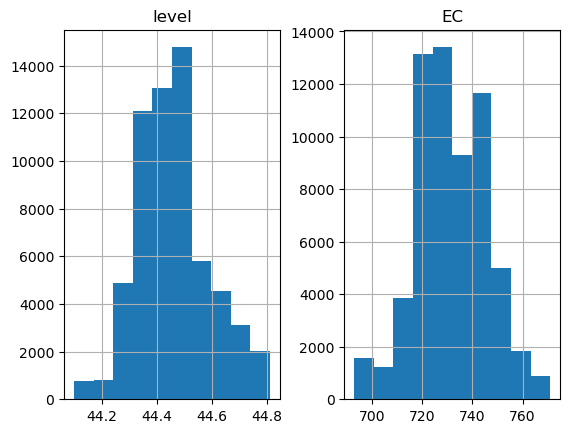

In [69]:
df.hist()
plt.show()

In [70]:
df1 = df.copy()
df1.head(3)

,level,EC
0,44.47,749
1,44.47,749
2,44.47,749


In [71]:
df1['level_z_score'] = (df1['level'] - df1['level'].mean())/df1['level'].std()
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std()
df1.head(3)

,level,EC,level_z_score,EC_z_score
0,44.47,749,0.0803,1.246237
1,44.47,749,0.0803,1.246237
2,44.47,749,0.0803,1.246237


표준화 후 통계량

In [72]:
df1.describe()

,level,EC,level_z_score,EC_z_score
count,61814.000000,61814.000000,6.181400e+04,6.181400e+04
mean,44.459701,731.698612,6.867484e-14,-2.067234e-15
std,0.128256,13.882905,1.000000e+00,1.000000e+00
min,44.100000,693.000000,-2.804553e+00,-2.787501e+00
25%,44.370000,722.000000,-6.993901e-01,-6.986011e-01
50%,44.450000,730.000000,-7.563803e-02,-1.223528e-01
75%,44.520000,742.000000,4.701450e-01,7.420196e-01
max,44.810000,771.000000,2.731246e+00,2.830920e+00


std 행과 mean행을 집중해서 보자  
두 변수의 평균이 0에 가깝고 표준편차는 1이다.  
또한 두 변수의 최댓값과 최솟값의 범위도 비슷해졌다.  

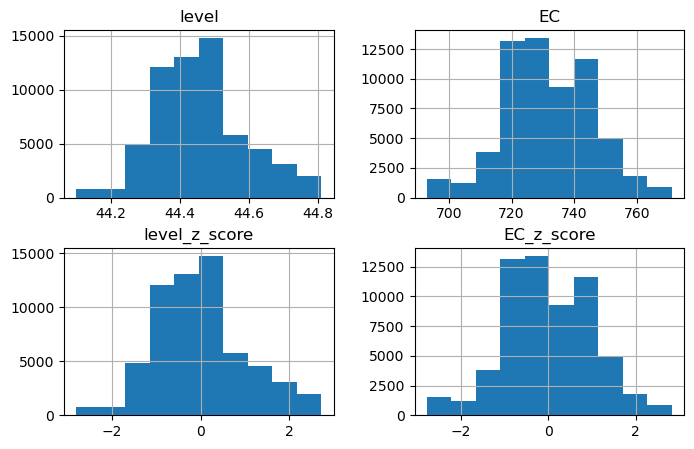

In [73]:
df1.hist(figsize = (8,5))
plt.show()

x축에 주목하자. 표준화 후 데이터가 평균 0을 중심으로 비슷한 범위에 분포한다  

df1['level_z_score'] = (df1['level'] - df1['level'].mean())/df1['level'].std()  
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std()  
df1.head(3)   
여기 코드를 보자 . z점수를 계산할때, 열이름을 입력해서 계산했지만   
일일이 열이름을 다 입력하지 않아도 된다.   
열이름 대신 아예 데이터프레임 변수 이름을 그대로 입력하면 한꺼번에 여러열을 계싼할 수 있따.   

In [74]:
df2 = df.copy()
df2_standard = (df2- df2.mean()) / df2.std()
df2_standard.head(3)

,level,EC
0,0.0803,1.246237
1,0.0803,1.246237
2,0.0803,1.246237


정규화를 해보자 

In [75]:
df3 = df.copy()

df3['level_minmax'] = (df3['level'] - df3['level'].min())/ (df3['level'].max() - df3['level'].min())
df3['EC_minmax'] = (df3['EC'] - df3['EC'].min())/ (df3['EC'].max() - df3['EC'].min())

df3.head(3)

,level,EC,level_minmax,EC_minmax
0,44.47,749,0.521127,0.717949
1,44.47,749,0.521127,0.717949
2,44.47,749,0.521127,0.717949


In [76]:
df3.describe()

,level,EC,level_minmax,EC_minmax
count,61814.000000,61814.000000,61814.000000,61814.000000
mean,44.459701,731.698612,0.506621,0.496136
std,0.128256,13.882905,0.180642,0.177986
min,44.100000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.380282,0.371795
50%,44.450000,730.000000,0.492958,0.474359
75%,44.520000,742.000000,0.591549,0.628205
max,44.810000,771.000000,1.000000,1.000000


두 변수의 최댓값과 최솟값이 1, 0 이 되었고   
두 변수의 평균과 표준편차가 거의 같아 졌음을 확인 할 수 있따  

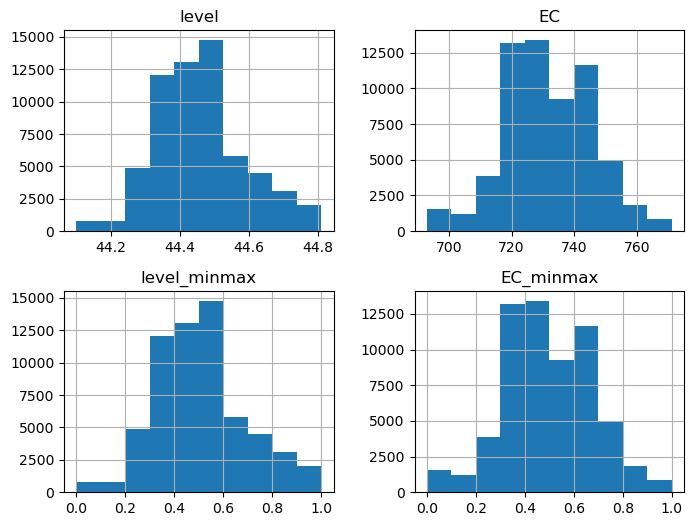

In [78]:
df3.hist(figsize = (8,6))
plt.show()

### ***타이타닉 호 탑승자 데이터 전처리***

In [79]:
df = pd.read_csv('./titanic.csv')
df.shape

(891, 12)

In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
q1 = df['Fare'].quantile(q=0.25)
q3 = df['Fare'].quantile(q=0.75)
IQR = q3 - q1

out1 = df[df['Fare'] > q3+1.5*IQR] 
out2 = df[df['Fare'] < q1-1.5*IQR]
len(out1) , len(out2)

(116, 0)

상한값보다 큰 이상치가 116개가 있다. 
부자라서 돈을 더 줬나보다 

In [82]:
sum(out1['Sex'] == 'male')

46

돈을 더 낸사람들 중에서도 남성이 46명, 그리고 116명 - 46명 = 70명  
돈을 더 낸사람들 중에서도 여성이 70명이다.  